In [62]:
!pip3 install numpy

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv', header = None)

# Extract the header from the first row and create a list of attributes names
attribute_names = df.iloc[0].tolist()
df.columns = attribute_names
# Create a DataFrame from the remaining rows (excluding the first one)
df = df[1:]


# Convert specific columns to numeric
columns_to_convert = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Exited']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Define X as dataset
X = df
print('X:', X.shape)

# Removing the redundant and focusing on relevant features
X = X.drop(X.columns[:3], axis=1)

X: (10000, 14)


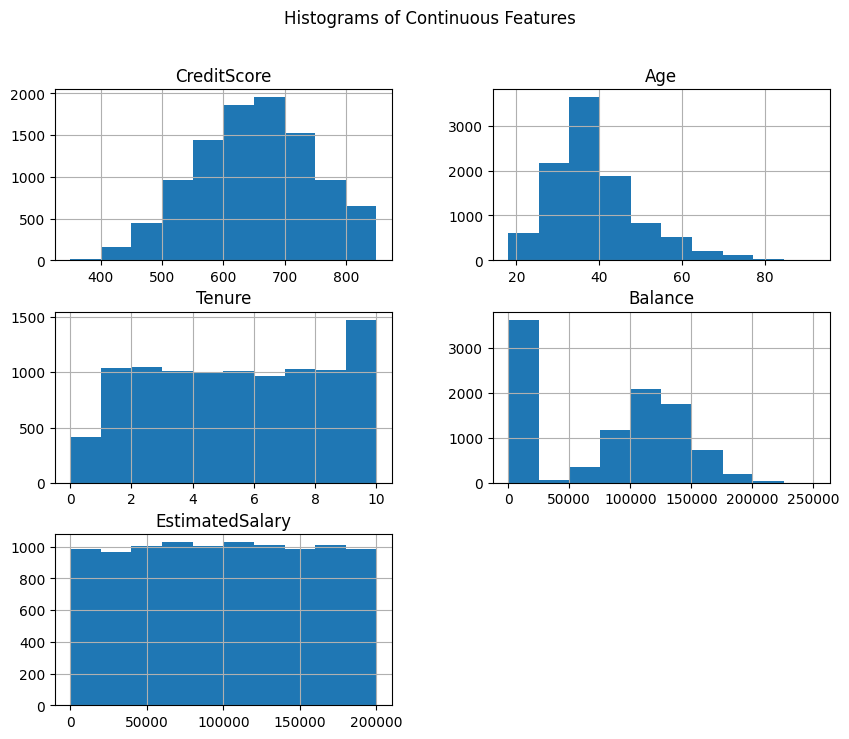

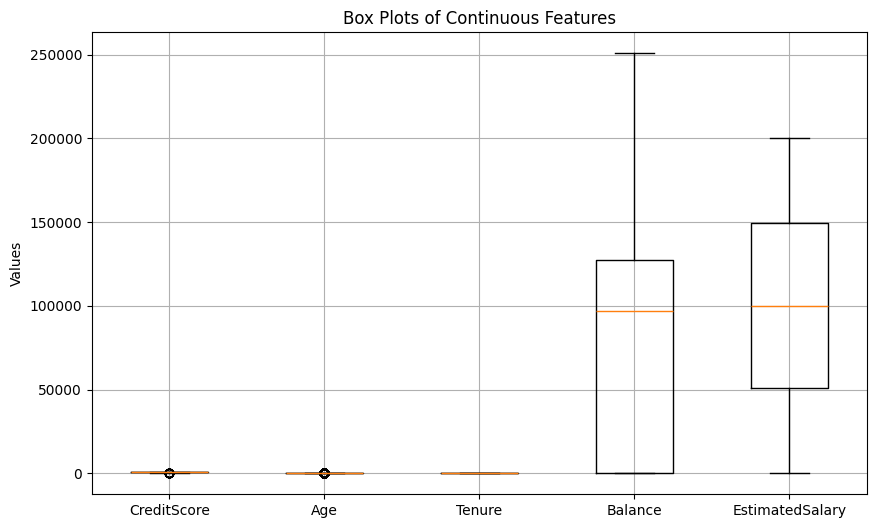

In [80]:
# Explore the Data
# Define continuous columns
continuous_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Plot histograms for continuous features
X[continuous_columns].hist(figsize=(10, 8))
plt.suptitle('Histograms of Continuous Features')
plt.show()


# Box Plot for each continuous variable
plt.figure(figsize=(10, 6))
plt.boxplot([X[col] for col in continuous_columns], tick_labels=continuous_columns)  # Using 'tick_labels'
plt.title('Box Plots of Continuous Features')
plt.ylabel('Values')
plt.grid(True)

# Show the plot
plt.show()

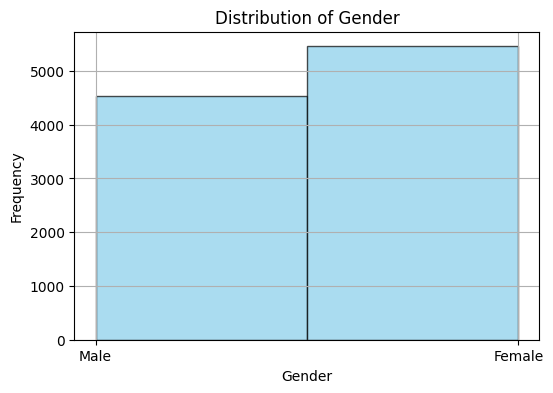

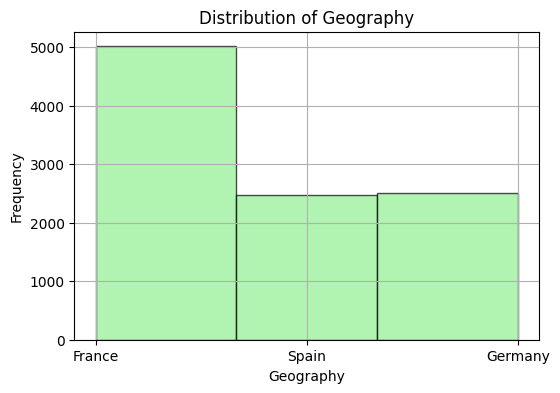

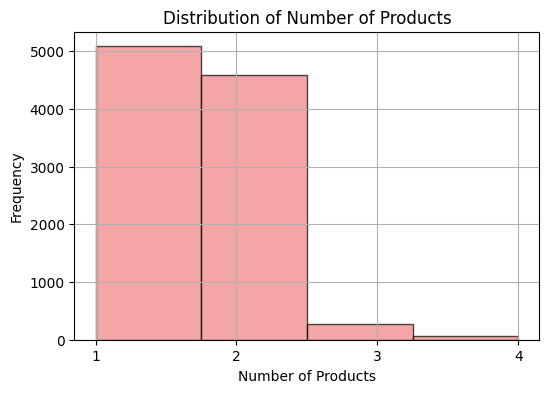

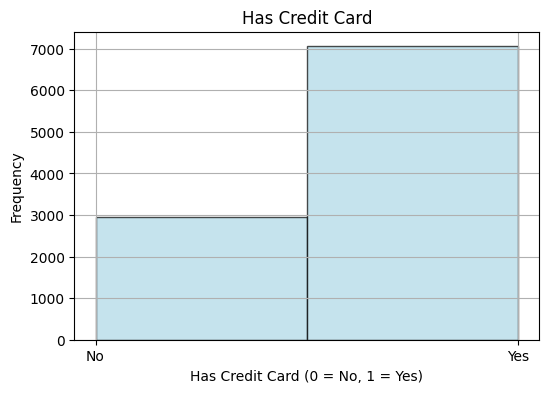

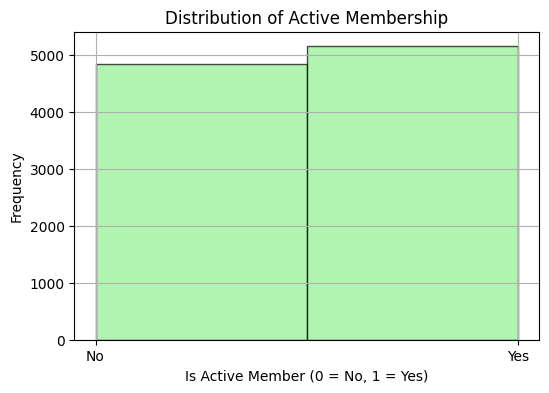

In [81]:
# Create a histogram for Gender
plt.figure(figsize=(6, 4))
plt.hist(X['Gender'], bins=2, edgecolor='black', alpha=0.7, color='skyblue')  # Use a single color
plt.xticks([0, 1], ['Male', 'Female'])  # Set labels for 0 as Male and 1 as Female
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

# Create a histogram for Geography (assume values are 'Spain', 'France', 'Germany')
plt.figure(figsize=(6, 4))
plt.hist(X['Geography'], bins=3, edgecolor='black', alpha=0.7, color='lightgreen')  # Single Geography column
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

# Histogram for NumOfProducts
plt.figure(figsize=(6, 4))
plt.hist(X['NumOfProducts'], bins=4, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4])  # Set ticks for each product category
plt.grid(True)

# Show the plot
plt.show()

# Histogram for HasCrCard
plt.figure(figsize=(6, 4))
plt.hist(X['HasCrCard'], bins=2, edgecolor='black', alpha=0.7, color='lightblue')
plt.title('Has Credit Card')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])  # Set labels for 0 as No and 1 as Yes
plt.grid(True)

# Show the plot
plt.show()

# Histogram for IsActiveMember
plt.figure(figsize=(6, 4))
plt.hist(X['IsActiveMember'], bins=2, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Active Membership')
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])  # Set labels for 0 as No and 1 as Yes
plt.grid(True)

# Show the plot
plt.show()

In [82]:
# Handle Missing Data
# Checking for missing values
missing_values_X = X.isnull().sum()
print("Missing values in each column of X:", missing_values_X[missing_values_X > 0])

Missing values in each column of X: Series([], dtype: int64)


In [86]:
# Label Encoding for Gender: 'Male' -> 1, 'Female' -> 0 
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0}) 

# One-Hot Encoding for Geography, generating Geography_Germany and Geography_Spain 
X = pd.get_dummies(X, columns=['Geography']) 

# Convert boolean columns (True/False) to integers (1/0) for one-hot encoded columns 
X['Geography_Germany'] = X['Geography_Germany'].astype(int) 
X['Geography_Spain'] = X['Geography_Spain'].astype(int) 
X['Geography_France'] = X['Geography_France'].astype(int)

print(X.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1          619       0   42       2       0.00              1          1   
2          608       0   41       1   83807.86              1          0   
3          502       0   42       8  159660.80              3          1   
4          699       0   39       1       0.00              2          0   
5          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
1               1        101348.88       1                 1   
2               1        112542.58       0                 0   
3               0        113931.57       1                 1   
4               0         93826.63       0                 1   
5               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  
1                  0                0  
2                  0                1  
3                  0                0 

In [87]:
# Feature Scaling
# Standardizing manually (scaling to mean 0, std 1)
X['Balance'] = (X['Balance'] - X['Balance'].mean()) / X['Balance'].std()  # Standardizing 'Balance'
X['Tenure'] = (X['Tenure'] - X['Tenure'].mean()) / X['Tenure'].std()  # Standardizing 'Tenure'
X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean()) / X['EstimatedSalary'].std()  # Standardizing 'EstimatedSalary'
X['CreditScore'] = (X['CreditScore'] - X['CreditScore'].mean()) / X['CreditScore'].std()  # Standardizing 'CreditScore'

# Display the standardized columns
print(X[['Balance', 'Tenure', 'EstimatedSalary', 'CreditScore']].head())

    Balance    Tenure  EstimatedSalary  CreditScore
1 -1.225786 -1.041708         0.021885    -0.326205
2  0.117344 -1.387468         0.216523    -0.440014
3  1.332987  1.032856         0.240675    -1.536717
4 -1.225786 -1.387468        -0.108912     0.501496
5  0.785689 -1.041708        -0.365258     2.063781


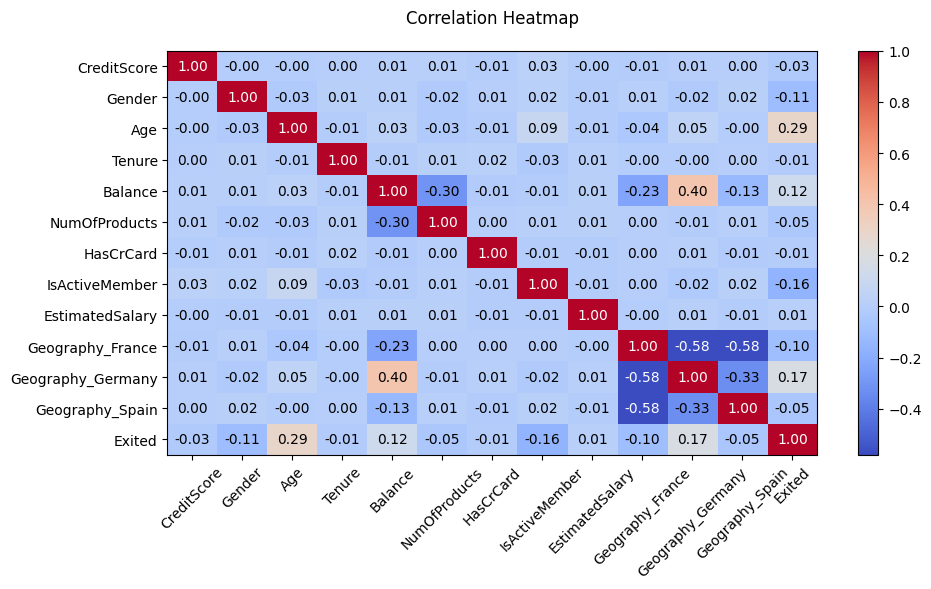

In [72]:
# Plotting Correlation Heatmap
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a figure for the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap using imshow
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')

# Add color bar
plt.colorbar()

# Set ticks and labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Set title
plt.title('Correlation Heatmap', pad=20)

# Annotate the heatmap with correlation coefficients
for (i, j), value in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='white' if abs(value) > 0.5 else 'black')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the title and labels
plt.show()

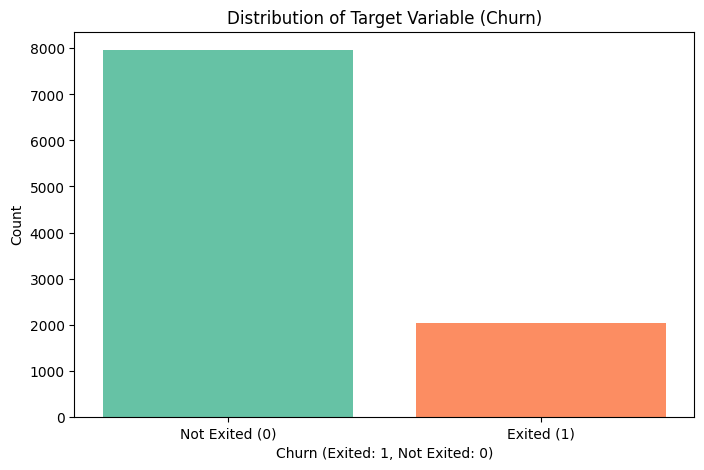

In [78]:
# Assuming 'Exited' is in your DataFrame X
# Calculate counts of Exited (1) and Not Exited (0)
counts = X['Exited'].value_counts()

# Set figure size
plt.figure(figsize=(8, 5))

# Create bar plot
plt.bar(counts.index, counts.values, color=['#66c2a5', '#fc8d62'])

# Set title and labels
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn (Exited: 1, Not Exited: 0)')
plt.ylabel('Count')
plt.xticks(counts.index, ['Not Exited (0)', 'Exited (1)'])

# Display the plot
plt.show()

In [73]:
# Creating separate DataFrames for Exited and Not_Exited and then spliting the train and test data for resolving class imbalance
X_not_exited = X[X['Exited'] == 0]
X_exited = X[X['Exited'] == 1]

# Define the size of the training set
train_size = 0.8

# Calculate the number of samples for training from each class
train_size_not_exited = int(len(X_not_exited) * train_size)
train_size_exited = int(len(X_exited) * train_size)

# Randomly sample the training data from each class
X_not_exited_train = X_not_exited.sample(n=train_size_not_exited, random_state=42)
X_exited_train = X_exited.sample(n=train_size_exited, random_state=42)

# Combine the training sets
X_train = pd.concat([X_not_exited_train, X_exited_train])

# Shuffle the training set
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)

#Creating the test set
X_not_exited_test = X_not_exited.drop(X_not_exited_train.index)
X_exited_test = X_exited.drop(X_exited_train.index)

# Combine the test sets
X_test = pd.concat([X_not_exited_test, X_exited_test])

# Shuffle the test set
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Removing the target variable - features (X) and target (Y)
Y_train = X_train['Exited']
Y_test = X_test['Exited']

X_train = X_train.drop(columns=['Exited'])
X_test = X_test.drop(columns=['Exited'])

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

print(f"Y_train: {Y_train.shape}")
print(f"Y_test: {Y_test.shape}")

X_train: (7999, 12)
X_test: (2001, 12)
Y_train: (7999,)
Y_test: (2001,)


In [234]:
#Hyperparameter Tuning
# Finding the best alpha for L2 and L1 regularization 
def find_best_alpha(X_train, Y_train, X_test, Y_test, reg_type):
    # Define candidate regularization parameters (alpha values)
    alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    
    # To store validation errors for each alpha
    validation_errors = []
    
    m, n = X_train.shape  # m = number of examples, n = number of features
    
    for alpha in alphas:
        # Initialize weights to zeros (or small random values)
        W = np.zeros(n)
        
        # Train the model using gradient descent for each alpha
        epochs = 100
        learning_rate = 0.001
        
        for epoch in range(epochs):
            # Predictions for training set
            Y_train_hat = np.dot(X_train, W)
            
            # Calculate gradients for L2 (Ridge) or L1 (Lasso) regularization
            if reg_type == 'l2':  # Ridge (L2)
                gradient = (2 / m) * np.dot(X_train.T, (Y_train_hat - Y_train)) + 2 * alpha * W
            elif reg_type == 'l1':  # Lasso (L1)
                gradient = (2 / m) * np.dot(X_train.T, (Y_train_hat - Y_train)) + alpha * np.sign(W)
            else:
                raise ValueError("reg_type must be 'l1' or 'l2'.")
            
            # Update weights using gradient descent
            W -=learning_rate * gradient
        
        # Validate the model on the test set
        Y_test_hat = np.dot(X_test, W)
        
        # Compute the validation MSE
        mse = np.mean((Y_test - Y_test_hat) ** 2)
        validation_errors.append(mse)
    
    # Find the best alpha (with the lowest validation error)
    best_alpha = alphas[np.argmin(validation_errors)]
    return best_alpha

In [235]:
# Definfing Sigmoid function
def sigmoid(z):
 return 1 / (1 + np.exp(-z))


#Defining Logistic Regression
def LogisticRegression(X_train, Y_train, X_test, Y_test, learning_rate, epochs, reg_type='none'):
    m, n = X_train.shape
    W = np.zeros(n + 1) # Weight vector initializatio- we started with a zero vector
    X_train = np.c_[np.ones((m, 1)), X_train] # Add bias term for train set
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term for test set

    best_alpha = None
    if reg_type in ['l1', 'l2']:
        best_alpha = find_best_alpha(X_train, Y_train, X_test, Y_test, reg_type)
        print(f"Best regularization parameter (alpha) for {reg_type}: {best_alpha}")

    for epoch in range (epochs):
        z = np.dot(X_train,W)
        Y_hat = sigmoid(z) #Computing predictions
        mse = np.mean((Y_train - Y_hat) ** 2) # Mean Squared Error

        if reg_type == 'l2':
            gradient = (2/m) * np.dot(X_train.T, (Y_hat - Y_train)) + 2*best_alpha*W # Gradient
        elif reg_type == 'l1':
            gradient = (2/m) * np.dot(X_train.T, (Y_hat - Y_train)) + best_alpha*np.sign(W) # Gradient
        else:
            gradient = (2/m) * np.dot(X_train.T, (Y_hat - Y_train)) # Gradient
        
        W = W-learning_rate * gradient  # Update weight

        if epoch % 10 == 0:
            print(f'Epoch {epoch}: MSE = {mse}')
            
    return W, Y_hat, mse

In [236]:
#Training data X_train using logistic regression
W, Y_hat, mse = LogisticRegression(X_train, Y_train, X_test, Y_test, learning_rate=0.001, epochs=10000, reg_type='none')
# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights from Logistic Regression:", np.round(W,5))
#We tried 100,000 interations and found that after almost 8000 iterations, MSE was almost stagnant around 0.67. 

Epoch 0: MSE = 0.25
Epoch 10: MSE = 0.1790799489187963
Epoch 20: MSE = 0.1789402185853646
Epoch 30: MSE = 0.17880314152954419
Epoch 40: MSE = 0.17866671574397716
Epoch 50: MSE = 0.17853093687428825
Epoch 60: MSE = 0.1783958012840182
Epoch 70: MSE = 0.17826130535387044
Epoch 80: MSE = 0.17812744548153325
Epoch 90: MSE = 0.17799421808174307
Epoch 100: MSE = 0.17786161958634356
Epoch 110: MSE = 0.17772964644434064
Epoch 120: MSE = 0.17759829512195374
Epoch 130: MSE = 0.17746756210266285
Epoch 140: MSE = 0.17733744388725228
Epoch 150: MSE = 0.1772079369938504
Epoch 160: MSE = 0.17707903795796553
Epoch 170: MSE = 0.17695074333251895
Epoch 180: MSE = 0.17682304968787385
Epoch 190: MSE = 0.17669595361186108
Epoch 200: MSE = 0.17656945170980168
Epoch 210: MSE = 0.17644354060452613
Epoch 220: MSE = 0.17631821693639027
Epoch 230: MSE = 0.17619347736328836
Epoch 240: MSE = 0.17606931856066302
Epoch 250: MSE = 0.17594573722151224
Epoch 260: MSE = 0.1758227300563933
Epoch 270: MSE = 0.1757002937934

In [242]:
#Training data X_train using logistic regression with L1(Lasso) regularization
W_l1, Y_hat, mse = LogisticRegression(X_train, Y_train, X_test, Y_test, learning_rate=0.001, epochs=10000, reg_type='l1')
# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights from Logistic Regression after applying L1 regularization:", np.round(W_l1,5))
#We tried 100,000 interations and found that after almost 8000 iterations, MSE was almost stagnant around 0.67. 

Best regularization parameter (alpha) for l1: 0.0001
Epoch 0: MSE = 0.25
Epoch 10: MSE = 0.17908014844637463
Epoch 20: MSE = 0.17894055802886594
Epoch 30: MSE = 0.17880361986420576
Epoch 40: MSE = 0.17866733197681572
Epoch 50: MSE = 0.17853169001856115
Epoch 60: MSE = 0.1783966903591699
Epoch 70: MSE = 0.17826232938551786
Epoch 80: MSE = 0.1781286035014509
Epoch 90: MSE = 0.17799550912784717
Epoch 100: MSE = 0.1778630427026757
Epoch 110: MSE = 0.17773120068105083
Epoch 120: MSE = 0.1775999795352826
Epoch 130: MSE = 0.1774693757549236
Epoch 140: MSE = 0.17733938584681194
Epoch 150: MSE = 0.1772100063351103
Epoch 160: MSE = 0.17708123376134155
Epoch 170: MSE = 0.176953064684421
Epoch 180: MSE = 0.17682549568068523
Epoch 190: MSE = 0.1766985233439168
Epoch 200: MSE = 0.17657214428536686
Epoch 210: MSE = 0.17644635513377352
Epoch 220: MSE = 0.17632115253537772
Epoch 230: MSE = 0.1761965331539356
Epoch 240: MSE = 0.17607249367072814
Epoch 250: MSE = 0.1759490307845676
Epoch 260: MSE = 0.175

In [243]:
#Training data X_train using logistic regression with L2(Ridge) regularization
W_l2, Y_hat, mse = LogisticRegression(X_train, Y_train, X_test, Y_test, learning_rate=0.001, epochs=11000, reg_type='l2')
# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights from Logistic Regression after applying L2 regularization:", np.round(W_l2,5))
#We tried 100,000 interations and found that after almost 8000 iterations, MSE was almost stagnant around 0.67. 

Best regularization parameter (alpha) for l2: 0.0001
Epoch 0: MSE = 0.25
Epoch 10: MSE = 0.17907995305644012
Epoch 20: MSE = 0.17894022309137464
Epoch 30: MSE = 0.17880314666430971
Epoch 40: MSE = 0.17866672177579782
Epoch 50: MSE = 0.1785309440683178
Epoch 60: MSE = 0.17839580990228435
Epoch 70: MSE = 0.1782613156553031
Epoch 80: MSE = 0.1781274577219932
Epoch 90: MSE = 0.1779942325140501
Epoch 100: MSE = 0.1778616364603047
Epoch 110: MSE = 0.17772966600677803
Epoch 120: MSE = 0.17759831761673256
Epoch 130: MSE = 0.17746758777071908
Epoch 140: MSE = 0.17733747296662014
Epoch 150: MSE = 0.1772079697196897
Epoch 160: MSE = 0.17707907456258906
Epoch 170: MSE = 0.17695078404541947
Epoch 180: MSE = 0.17682309473575097
Epoch 190: MSE = 0.17669600321864806
Epoch 200: MSE = 0.176569506096692
Epoch 210: MSE = 0.1764435999899999
Epoch 220: MSE = 0.17631828153624043
Epoch 230: MSE = 0.17619354739064688
Epoch 240: MSE = 0.1760693942260267
Epoch 250: MSE = 0.17594581873276838
Epoch 260: MSE = 0.17

In [244]:
# Evaluate model based on test data set
def predict(W, X_test, Y_test):
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term for test set
    # Compute predictions for the test set
    z = np.dot(X_test, W)
    Y_test_hat = sigmoid(z)
    # Calculate Mean Squared Error (MSE)
    test_mse = np.mean((Y_test - Y_test_hat) ** 2)
    test_rmse = np.sqrt(test_mse)
    return Y_test_hat, test_rmse

In [245]:
# Test Evaluation
Y_test_hat, test_rmse = predict(W, X_test, Y_test)
print(f"Test RMSE for Logistic Regression: {test_rmse}")

Y_test_hat_l1, test_rmse_l1 = predict(W_l1, X_test, Y_test)
print(f"Test RMSE for Logistic Regression after applying L1 regularization: {test_rmse_l1}")

Y_test_hat_l2, test_rmse_l2 = predict(W_l2, X_test, Y_test)
print(f"Test RMSE for Logistic Regression after applying L2 regularization: {test_rmse_l2}")

Test RMSE for Logistic Regression: 0.3777873648113815
Test RMSE for Logistic Regression after applying L1 regularization: 0.37780920676019253
Test RMSE for Logistic Regression after applying L2 regularization: 0.37688211968131274


In [250]:
# Top Feature impacting model
max_weight_idx = np.argmax(np.abs(W[1:])) + 1
column_name= X.columns[max_weight_idx]
print(column_name)
print(X)

EstimatedSalary
       CreditScore  Gender  Age    Tenure   Balance  NumOfProducts  HasCrCard  \
1        -0.326205       0   42 -1.041708 -1.225786              1          1   
2        -0.440014       0   41 -1.387468  0.117344              1          0   
3        -1.536717       0   42  1.032856  1.332987              3          1   
4         0.501496       0   39 -1.387468 -1.225786              2          0   
5         2.063781       0   43 -1.041708  0.785689              1          1   
...            ...     ...  ...       ...       ...            ...        ...   
9996      1.246426       1   39 -0.004426 -1.225786              2          1   
9997     -1.391870       1   35  1.724377 -0.306363              1          1   
9998      0.604958       0   36  0.687096 -1.225786              1          0   
9999      1.256772       1   42 -0.695947 -0.022606              2          1   
10000     1.463698       0   28 -0.350186  0.859922              1          1   

       IsAc